# FLARUBIN 

In [2]:
import os
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

/Users/riley/Desktop/RAFTS/Notebooks
/Users/riley/Desktop/RAFTS


## Initialize and Calibrate Composite Spectra

Flux contribution of a flare corresponding to 10000K BB + MD spectrum with FF = 0.05. Expected = 0.5, Result = 0.5


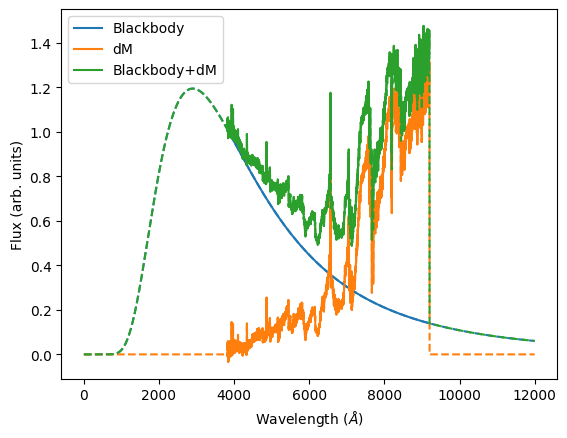

In [3]:
%matplotlib inline

import numpy as np 
from utils import *
from config import *
import globals
from importlib import reload
import matplotlib.pyplot as plt
from mdwarf_interp import mdwarf_interp

import warnings

def fxn():
    warnings.warn("runtime", RuntimeWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

globals.initialize()

TEMP = 10000

mdinterp = mdwarf_interp('m5.active.ha.na.k.fits', plotit=False)
md = mdinterp(WAVELENGTH)

bb = make_bb(WAVELENGTH, TEMP) * globals.BBnorm
md_bb = md + bb

def bb_fraction(md, T=10000, ff=globals.FF):
    bb = make_bb(WAVELENGTH, T) * globals.BBnorm
    ff = ff / globals.FF #makes ff = 1.0 by default
    md_bb = md + bb * ff
    return sed_integ(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]*ff) / sed_integ(WAVELENGTH[WMIN:WMAX],md_bb[WMIN:WMAX])

#TEST:
result = bb_fraction(md)
print('Flux contribution of a flare corresponding to 10000K BB + MD spectrum with FF = 0.05. Expected = 0.5, Result = {}'.format(result))

assert result == 0.5, "WARNING: FAILED NORMALIZATION TEST"

plt.plot(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX], c='C0', label='Blackbody')
plt.plot(WAVELENGTH[WMIN:WMAX], md[WMIN:WMAX], c='C1', label='dM')
plt.plot(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]+md[WMIN:WMAX], c='C2', label='Blackbody+dM')
plt.legend();
plt.plot(WAVELENGTH, bb, c='C0', ls='--', label='Blackbody')
plt.plot(WAVELENGTH, md, c='C1', ls='--', label='dM5')
plt.plot(WAVELENGTH, bb+md, c='C2', ls='--', label='BB+dM5')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel('Flux (arb. units)')
plt.savefig('Figures/bb_calib.png', dpi=300, bbox_inches='tight');

In [4]:
#what is the fract of total MD flux + BB ff 5% if BB T = 5000, what is total flux contributed by BB?

print(sed_integ(WAVELENGTH, md), sed_integ(WAVELENGTH[WMIN:WMAX], bb[WMIN:WMAX]),sed_integ(WAVELENGTH[WMIN:WMAX], md_bb[WMIN:WMAX]))

2354.9463148098057 2354.9463148098052 4709.8926296196105


## Visualizations

in R DCR should be 57.1 arcsec:  26.148239108896696


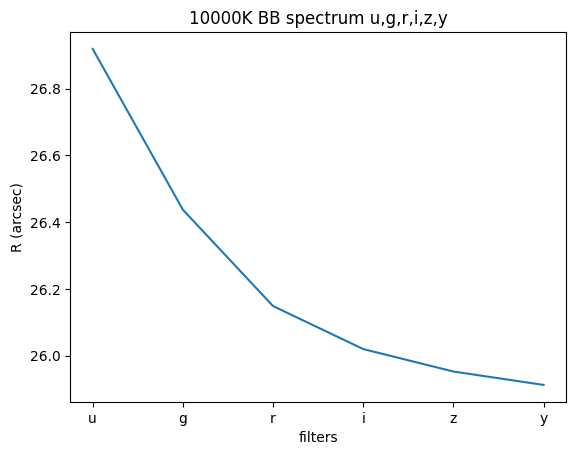

In [5]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']

weff = np.array([lamb_eff_BB(band=f, temp=TEMP, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = globals.airmass))
plt.xlabel("filters")
plt.ylabel("R (arcsec)")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("{}K BB spectrum u,g,r,i,z,y".format(TEMP))
print("in R DCR should be 57.1 arcsec: ", dcr_offset(weff[2], airmass = globals.airmass))

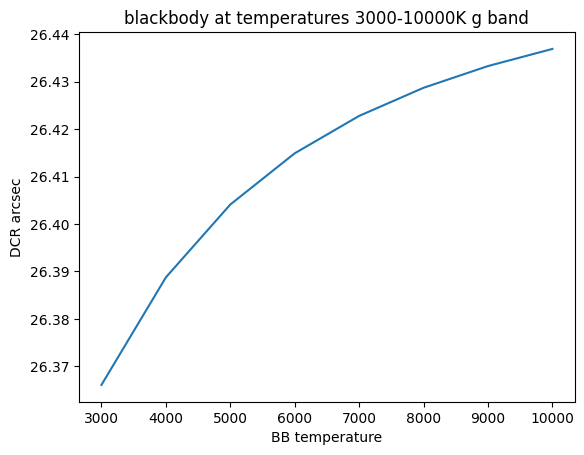

In [6]:
weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) for t in range(3000,11000,1000)])
plt.plot(range(3000,11000,1000), dcr_offset(weff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K g band");

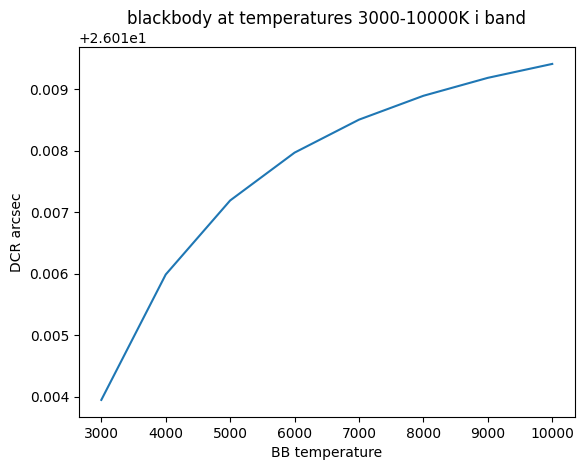

In [7]:
weff = np.array([lamb_eff_BB(band="i", temp=t, verbose=False) 
                 for t in range(3000,11000,1000)])
plt.plot(range(3000,11000,1000),dcr_offset(weff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K i band");

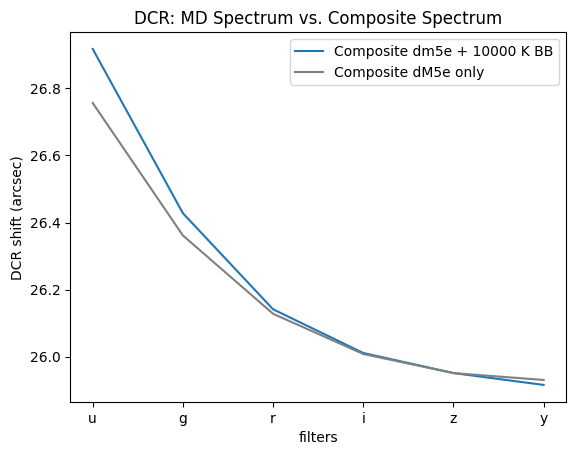

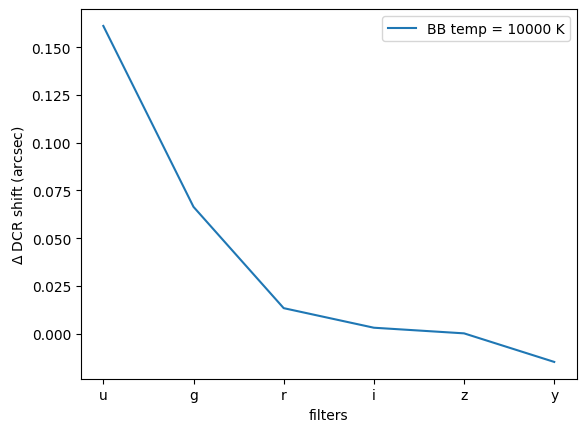

In [8]:
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

w_eff1 = np.array([lamb_eff_md(band=f, temp=TEMP, mdonly=True) for f in filters])
w_eff2 = np.array([lamb_eff_md(band=f, temp=TEMP) for f in filters])

ax1.plot(dcr_offset(w_eff2, airmass = globals.airmass), label='Composite dm5e + {} K BB'.format(TEMP))
ax1.plot(dcr_offset(w_eff1, airmass = globals.airmass), c='grey', label="Composite dM5e only")

ax1.set_ylabel("DCR shift (arcsec)")
ax1.set_xlabel("filters")
ax1.set_xticks(range(6))
ax1.set_xticklabels(["u","g","r","i","z","y"])
ax1.set_title("DCR: MD Spectrum vs. Composite Spectrum")
ax1.legend()

ax2.plot(dcr_offset(w_eff2, airmass = globals.airmass) - dcr_offset(w_eff1, airmass = globals.airmass), label='BB temp = {} K'.format(TEMP))
ax2.set_ylabel(r"$\Delta$ DCR shift (arcsec)")
ax2.set_xlabel("filters")
ax2.set_xticks(range(6))
ax2.set_xticklabels(["u","g","r","i","z","y"])
ax2.legend()

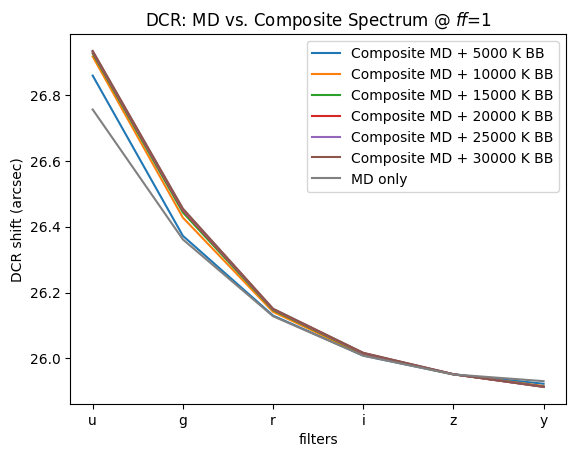

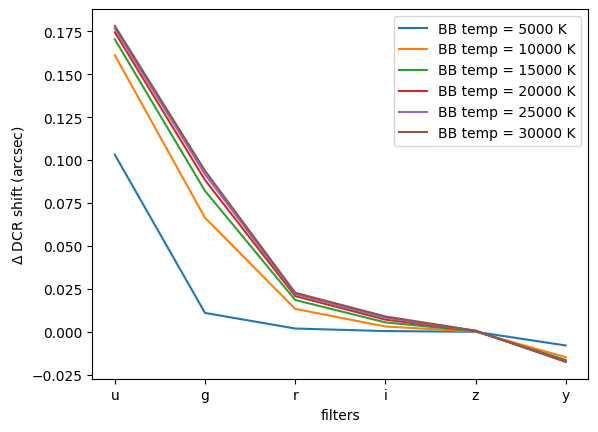

In [9]:
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

for temp in range(5000,35000,5000):

    w_eff1 = np.array([lamb_eff_md(band=f, temp=temp, mdonly=True) for f in filters])
    w_eff2 = np.array([lamb_eff_md(band=f, temp=temp) for f in filters])

    ax1.plot(dcr_offset(w_eff2, airmass = globals.airmass), label='Composite MD + {} K BB'.format(temp))
    ax2.plot(dcr_offset(w_eff2, airmass = globals.airmass) - dcr_offset(w_eff1, airmass = globals.airmass), label='BB temp = {} K'.format(temp))

ax1.plot(dcr_offset(w_eff1, airmass = globals.airmass), c='grey', label="MD only")
ax1.set_ylabel("DCR shift (arcsec)")
ax1.set_xlabel("filters")
ax1.set_xticks(range(6))
ax1.set_xticklabels(["u","g","r","i","z","y"])
ax1.set_title(r"DCR: MD vs. Composite Spectrum @ $ff$=1")
ax1.legend()


ax2.set_ylabel(r"$\Delta$ DCR shift (arcsec)")
ax2.set_xlabel("filters")
ax2.set_xticks(range(6))
ax2.set_xticklabels(["u","g","r","i","z","y"])
ax2.legend()

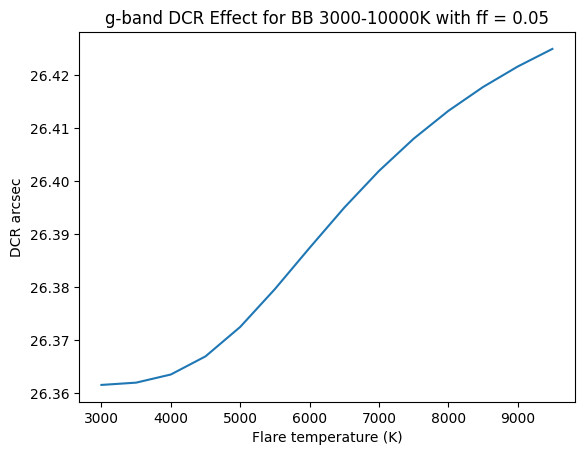

In [10]:
w_eff = np.array([lamb_eff_md(band='g', temp=t) for t in range(3000,10000,500)])
plt.plot(range(3000,10000,500), dcr_offset(w_eff, airmass = globals.airmass))
plt.ylabel("DCR arcsec")
plt.xlabel("Flare temperature (K)")
plt.title("g-band DCR Effect for BB 3000-10000K with ff = 0.05");

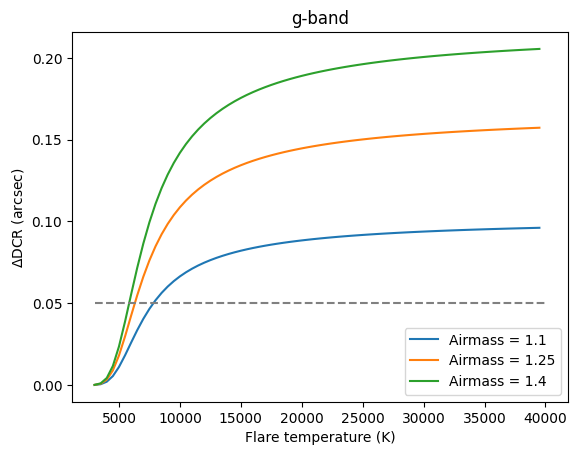

In [11]:
w_eff1 = np.array([lamb_eff_md(band='g', temp=t, ff=globals.FF, mdonly=True) for t in range(3000,40000,500)])
w_eff2 = np.array([lamb_eff_md(band='g', temp=t, ff=globals.FF) for t in range(3000,40000,500)])
plt.plot(range(3000,40000,500), dcr_offset(w_eff2, airmass = 1.1)-dcr_offset(w_eff1, airmass = 1.1), label="Airmass = 1.1")
plt.plot(range(3000,40000,500), dcr_offset(w_eff2, airmass = 1.25)-dcr_offset(w_eff1, airmass = 1.25), label="Airmass = 1.25")
plt.plot(range(3000,40000,500), dcr_offset(w_eff2, airmass = 1.4)-dcr_offset(w_eff1, airmass = 1.4), label="Airmass = 1.4")
plt.hlines(0.05,3000,40000, color='grey', ls='--',)
plt.ylabel(r"$\Delta$DCR (arcsec)")
plt.xlabel("Flare temperature (K)")
plt.title(r"g-band")
plt.legend()
plt.savefig('Figures/deltashifttemp_g.png', dpi=300, bbox_inches='tight')

### Temp vs Airmass Heatmap

In [337]:
#generate grid
bins = 20
grid = np.zeros([bins,bins])

ams = np.arange(1.05, 2.05, 0.05)
temps = np.arange(2000, 42000, 2000)

x = np.load('Notebooks/baseline3.0_am.npy')
y = np.load('Notebooks/ef3temps.npy')

for i, am in enumerate(ams):
    for j, temp in enumerate(temps):
        w_eff1 = np.array(lamb_eff_md(band='g', temp=temp, ff=globals.FF, mdonly=True))
        w_eff2 = np.array(lamb_eff_md(band='g', temp=temp, ff=globals.FF))
        grid[i][j] = dcr_offset(w_eff2, airmass = am) - dcr_offset(w_eff1, airmass = am)

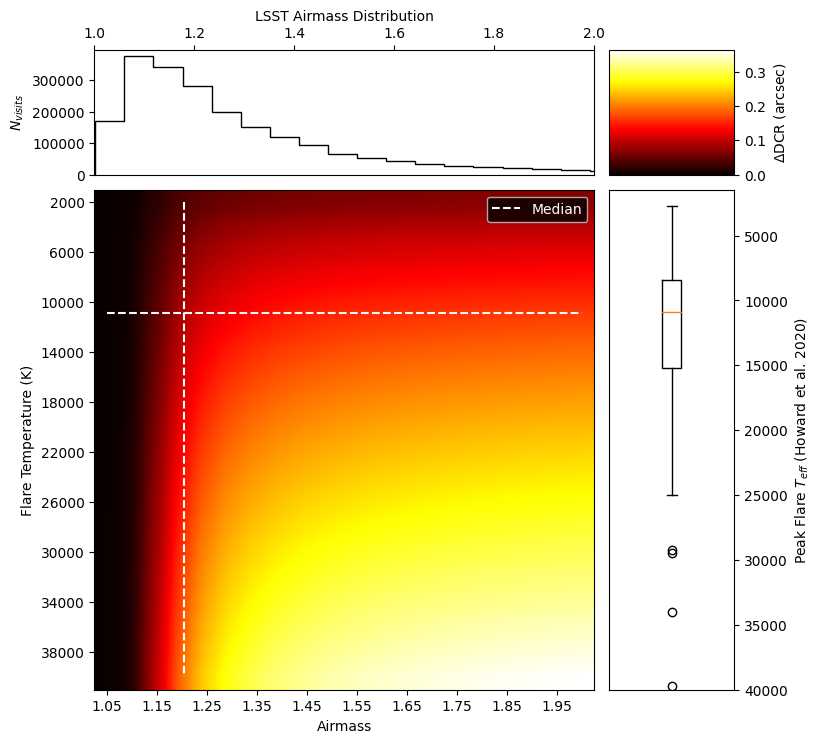

In [543]:
#Plotting
fig = plt.figure(figsize=(8,8))

fig.tight_layout()

gs = fig.add_gridspec(2, 2,  width_ratios=(4,1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax_img = fig.add_subplot(gs[1,0])
ax_boxh = fig.add_subplot(gs[0,0])
ax_boxv = fig.add_subplot(gs[1,1])
ax_cbar = fig.add_subplot(gs[0,1])

from scipy.stats import kurtosis
N = len(x)
N_bins = 1 + np.log2(N) + np.log2(1 + kurtosis(x) * np.sqrt(N / 6))

ax_boxh.hist(x, bins=int(N_bins), color='k', histtype='step')
ax_boxh.set_xlim(1.0,2.0)
ax_boxh.xaxis.tick_top()
ax_boxh.set_ylabel(r'$N_{visits}$')
ax_boxh.set_xlabel('LSST Airmass Distribution')
ax_boxh.xaxis.set_label_position('top')


ax_boxv.boxplot(y, vert=True)
ax_boxv.set_ylim(1500,40000)
ax_boxv.set_xticks([])
ax_boxv.yaxis.tick_right()
ax_boxv.invert_yaxis()
ax_boxv.set_ylabel(r'Peak Flare $T_{eff}$ (Howard et al. 2020)')
ax_boxv.yaxis.set_label_position('right')

img = ax_img.imshow(grid, interpolation='gaussian', cmap='hot')

ax_img.hlines((np.median(y)-2000) / 2000, (1.05-1.05) / 0.05, (2.0-1.05) / 0.05, color='white', linestyles='--', label='Median')
ax_img.vlines((np.median(x)-1.05) / 0.05, (2000-2000) / 2000, (40000-2000) / 2000,  color='white', linestyles='--')

#for q in np.quantile(x, [0.25, 0.75]):
#    ax_img.vlines((q-1.05) / 0.05, (2000-2000) / 2000, (40000-2000) / 2000,  color='white', linestyles=':')

#for q in np.quantile(y, [0.25, 0.75]):
#   ax_img.hlines((q-2000) / 2000, (1.05-1.05) / 0.05, (2.0-1.05) / 0.05, color='white', linestyles=':')

#ax.vlines([(x.mean()-1.05) / 0.05, (x.mean() + x.std() -1.05) / 0.05], ((14000-3400) - 2000) / 2000, ((14000+8300) - 2000) / 2000,  color='white')
#ax.hlines([((14000-3400) - 2000) / 2000, ((14000+8300) - 2000) / 2000], (x.mean()-1.05) / 0.05, (x.mean()+x.std()-1.05) / 0.05, color='white')

ax_img.set_xticks(np.arange(0,bins,2))
ax_img.set_yticks(np.arange(0,bins,2))
ax_img.set_position([0.1,0.1,0.625,0.625])
ax_img.set_xticklabels(np.round(ams[::2], decimals=2))
ax_img.set_yticklabels(temps[::2])
ax_img.set_xlabel('Airmass')
ax_img.set_ylabel('Flare Temperature (K)')
cbar = fig.colorbar(img, cax=ax_cbar)
cbar.set_label(r'$\Delta$DCR (arcsec)')
ax_img.legend(facecolor='k', labelcolor='white')
plt.savefig('Figures/temp_am_grid.png', dpi=300, bbox_inches='tight')


For an observed flare, given flare temp, given temp distribution (Howard et al.)

-observe a flare, assume some astrometric precision q

-A_crit(T) = critical airmass at T where deltaDCR > q

-P(delta DCR) = P(airmass > A_crit(T) | P(T))

In [599]:
qs = [0.10, 0.20, 0.30]
ams = np.arange(1.05, 3.05, 0.05)
temps = np.arange(2000, 40500, 500)

a_crit = np.empty([len(qs), len(temps)]) #a_crit = airmass at or above which delta dcr exceeds precision limit q for a given temp
a_crit[:] = np.nan

#make temp v airmass grid for all q values
for i, q in enumerate(qs):
    for j, temp in enumerate(temps):
        for k, am in enumerate(ams):
            w_eff1 = np.array(lamb_eff_md(band='g', temp=temp, ff=globals.FF, mdonly=True))
            w_eff2 = np.array(lamb_eff_md(band='g', temp=temp, ff=globals.FF))
            dcr = dcr_offset(w_eff2, airmass = am) - dcr_offset(w_eff1, airmass = am)

            if dcr > q:
                a_crit[i][j] = am #Each row corresponds to a q value, each column to a temp
                break
            else:
                continue

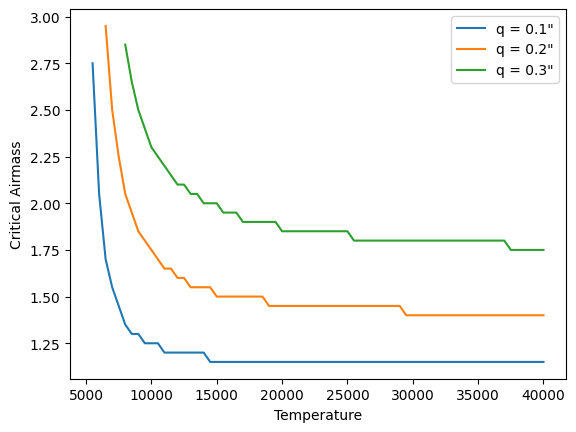

In [601]:
for q, row in zip(qs, a_crit):
    plt.plot(temps, row, label='q = {}"'.format(q))
plt.xlabel('Temperature')
plt.ylabel('Critical Airmass')
plt.legend()

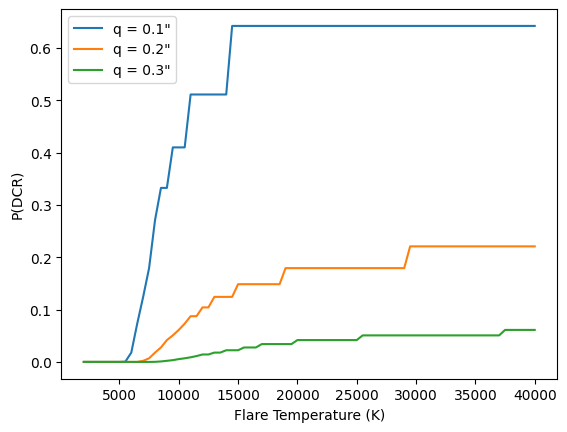

In [623]:
#Calculate conditional prob for all temps and q and plot
for i, row in enumerate(a_crit):
    pdcrs = []
    for j, a in enumerate(row):
        pa = len(x[x > a]) / len(x)
        pb = len(y[y > temps[j]]) / len(y)
        pdcr = (pa * pb) / pb #P(DCR) = P(A | B) = (P(A) * P(B)) / P(B)
        pdcrs.append(pdcr)
    plt.plot(temps, pdcrs, label='q = {}"'.format(qs[i]))
plt.xlabel('Flare Temperature (K)')
plt.ylabel('P(DCR)')
plt.legend()
plt.savefig('Figures/pdcr.png', dpi=300, bbox_inches='tight')

### Total DCR Plots

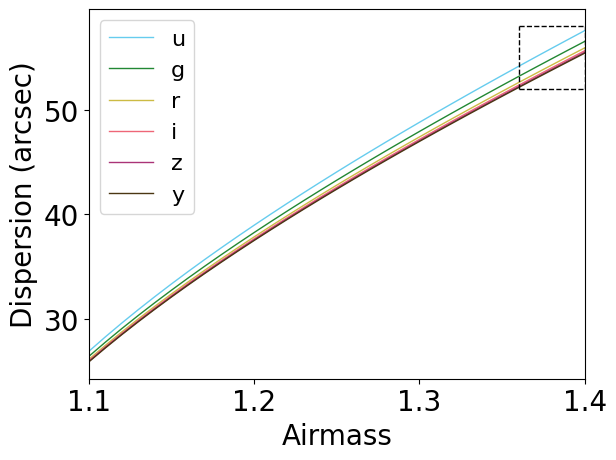

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

filtercolors = {
            "u": "#66CCEE",
            "g": "#228833",
            "r": "#CCBB44",
            "i": "#EE6677",
            "z": "#AA3377",
            "y": "#4B3713",
            " ": None}

ams = np.arange(1.1,1.41,0.01)


for b in filters:
    w_eff = np.array(lamb_eff_BB(band=b, temp=10000))
    plt.plot(ams, dcr_offset(w_eff, airmass = ams), color=filtercolors[b], lw=1, label='{}'.format(b))

plt.xlim(ams.min(), ams.max())
plt.xticks(np.linspace(ams.min(), ams.max(), 4))
plt.tick_params(labelsize=20)
ax.vlines([1.36, 1.4], 52, 58, color='k', lw=1, ls='--')
ax.hlines([52, 58], 1.36, 1.4, color='k', lw=1, ls='--')
plt.xlabel('Airmass', fontsize=20)
plt.ylabel('Dispersion (arcsec)', fontsize=20)
plt.legend(fontsize=16, loc='upper left')
plt.savefig('Figures/better_dcrfig.png', dpi=300, bbox_inches='tight')

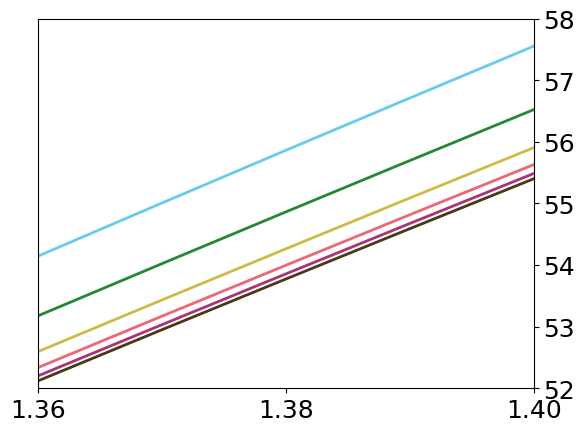

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

ams = np.arange(1.36,1.41,0.01)

for b in filters:
    w_eff = np.array(lamb_eff_BB(band=b, temp=10000))
    plt.plot(ams, dcr_offset(w_eff, airmass = ams), color=filtercolors[b], lw=2, label='{}'.format(b))

plt.xlim(ams.min(), ams.max())
plt.xticks(np.linspace(ams.min(), ams.max(), 3))
plt.ylim(52,58)
ax.yaxis.tick_right()
plt.tick_params(labelsize=18)


### Astrometric Error plots

In [12]:
def dcr_curve(temps, band, airmass):

    w_eff1 = np.array([lamb_eff_md(band=band, temp=t, ff=globals.FF, mdonly=True) for t in temps])
    w_eff2 = np.array([lamb_eff_md(band=band, temp=t, ff=globals.FF) for t in temps])

    ddcr = dcr_offset(w_eff2, airmass = airmass) - dcr_offset(w_eff1, airmass = airmass)

    return ddcr

In [13]:
def errorplot(testtemps, band, airmass):

    temps = range(3000,60000,500)
    testtemps = [5000, 10000, 25000]
    curve = dcr_curve(temps, band, airmass)

    plt.plot(temps, curve)

    for testtemp in testtemps:
        curvetest = dcr_curve([testtemp], band, airmass)
        lower = curvetest - 0.05
        upper = curvetest + 0.05
        xerr_lower = temps[np.where(curve == curve[min(range(len(curve)), key = lambda i: abs(curve[i] - lower))])[0][0]]
        xerr_upper = temps[np.where(curve == curve[min(range(len(curve)), key = lambda i: abs(curve[i] - upper))])[0][0]]
        print('Flare temp = {0}K: Upper error bound = {1}K, lower error bound = {2}K'.format(testtemp, xerr_upper, xerr_lower))
        plt.errorbar(testtemp, curvetest, yerr = 0.05, xerr = [[testtemp - xerr_lower], [xerr_upper - testtemp]], marker='o', capsize=3)

    plt.ylabel(r"$\Delta$ DCR shift (arcsec)")
    plt.xlabel("Flare temperature (K)")
    plt.title('{0}-band, airmass={1}'.format(band, airmass));

Flare temp = 5000K: Upper error bound = 5500K, lower error bound = 4500K
Flare temp = 10000K: Upper error bound = 59500K, lower error bound = 6500K
Flare temp = 25000K: Upper error bound = 59500K, lower error bound = 8000K


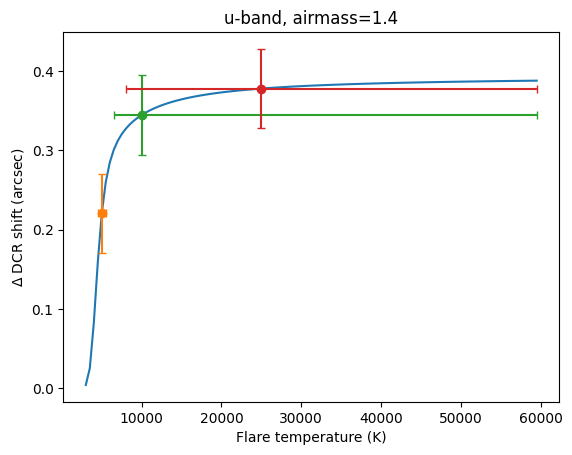

In [14]:
errorplot(testtemps=[5000, 10000, 25000], band='u', airmass=1.4)

Flare temp = 5000K: Upper error bound = 6500K, lower error bound = 3000K
Flare temp = 10000K: Upper error bound = 21500K, lower error bound = 7000K
Flare temp = 25000K: Upper error bound = 59500K, lower error bound = 10500K


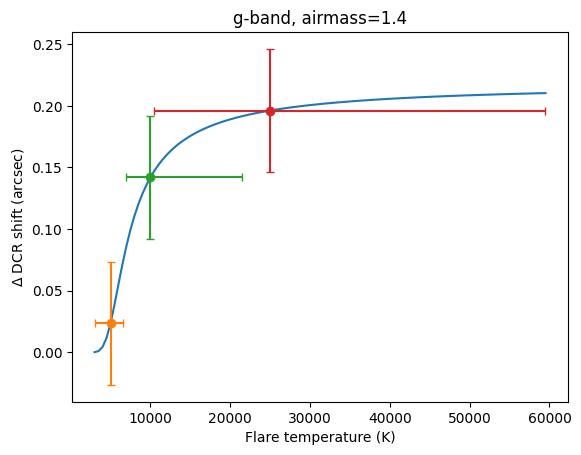

In [15]:
errorplot(testtemps=[5000, 10000, 25000], band='g', airmass=1.4)

Flare temp = 5000K: Upper error bound = 5500K, lower error bound = 4000K
Flare temp = 10000K: Upper error bound = 12000K, lower error bound = 9000K
Flare temp = 25000K: Upper error bound = 59500K, lower error bound = 16000K


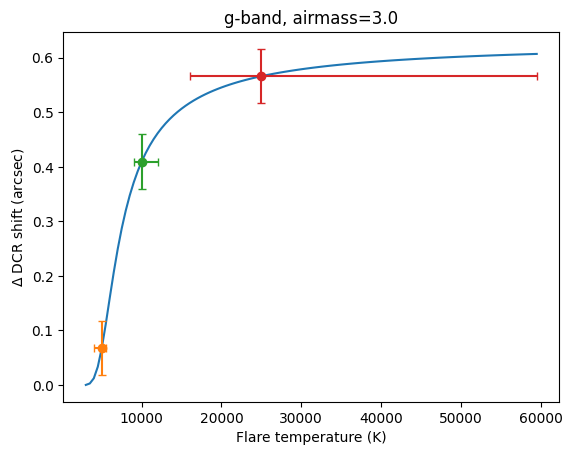

In [16]:
errorplot(testtemps=[5000, 10000, 25000], band='g', airmass=3.0)

### Filter-airmass Gridplots

In [17]:
def makegrid(temp, ff, ams, delta=False):

    grid = np.zeros((6,6))

    ams = ams

    if delta:
        for i, am in enumerate(ams):
            for j, f in enumerate(filters):
                w_eff1 = lamb_eff_md(band=f, temp=temp, ff=ff, mdonly=True) 
                w_eff2 = lamb_eff_md(band=f, temp=temp, ff=ff) 
                grid[i][j] = dcr_offset(w_eff2, airmass=am) - dcr_offset(w_eff1,airmass=am)

    else:
        for i, am in enumerate(ams):
            for j, f in enumerate(filters):
                w_eff = lamb_eff_md(band=f, temp=temp, ff=ff) 
                grid[i][j] = dcr_offset(w_eff, airmass=am)

    return grid

In [18]:
#Generate grids
temp, ff = 5000, globals.FF*4
grid = makegrid(temp, ff, AMS)
deltagrid = makegrid(temp, ff, AMS, delta=True)

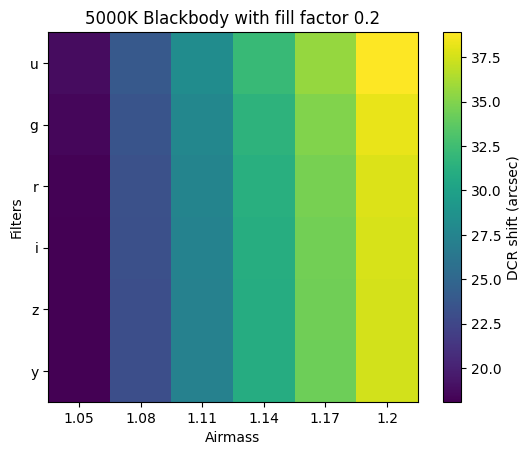

In [19]:
fig3, ax3 = plt.subplots(1,1)

c = ax3.imshow(grid.T)

ax3.set_xticks(range(6))
ax3.set_xticklabels(np.round(AMS, decimals=2))
ax3.set_yticks(range(6))
ax3.set_yticklabels(["u","g","r","i","z","y"])
ax3.set_ylabel("Filters")
ax3.set_xlabel("Airmass")
ax3.set_title('{0}K Blackbody with fill factor {1}'.format(temp, ff))

cbar = fig3.colorbar(c)
cbar.set_label('DCR shift (arcsec)', rotation=90)


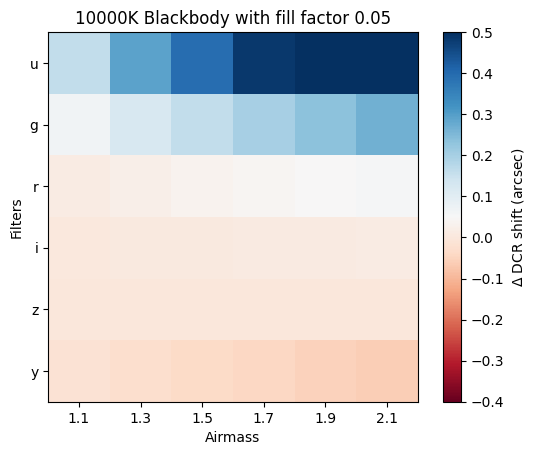

In [20]:
#Generate grids
temp, ff = 10000, globals.FF
AMS = np.linspace(1.1,2.1,6)
deltagrid = makegrid(temp, ff, AMS, delta=True)

fig3, ax3 = plt.subplots(1,1)

#c = ax3.imshow(deltagrid.T, cmap='Blues', norm=colors.LogNorm(vmin=0.01, vmax=0.4))
c = ax3.imshow(deltagrid.T, cmap='RdBu', clim=(-0.4, 0.5))

ax3.set_xticks(range(6))
ax3.set_xticklabels(np.round(AMS, decimals=2))
ax3.set_yticks(range(6))
ax3.set_yticklabels(["u","g","r","i","z","y"])
ax3.set_ylabel("Filters")
ax3.set_xlabel("Airmass")
ax3.set_title('{0}K Blackbody with fill factor {1}'.format(temp,ff))

cbar = fig3.colorbar(c)
cbar.set_label(r'$\Delta$ DCR shift (arcsec)', rotation=90)

plt.savefig('Figures/deltagridlog{}.png'.format(temp), dpi=300, bbox_inches='tight')

In [21]:
temp0, ff0 = 5000, globals.FF
deltagrid0 = makegrid(temp0, ff0, AMS, delta=True)

temp1, ff1 = 10000, globals.FF
deltagrid1 = makegrid(temp1, ff1, AMS, delta=True)

temp2, ff2 = 20000, globals.FF
deltagrid2 = makegrid(temp2, ff2, AMS, delta=True)

temp3, ff3 = 40000, globals.FF
deltagrid3 = makegrid(temp3, ff3, AMS, delta=True)

temp4, ff4 = 5000, globals.FF*4
deltagrid4 = makegrid(temp4, ff4, AMS, delta=True)

temp5, ff5 = 10000, globals.FF*4
deltagrid5 = makegrid(temp5, ff5, AMS, delta=True)

temp6, ff6 = 20000, globals.FF*4
deltagrid6 = makegrid(temp6, ff6, AMS, delta=True)

temp7, ff7 = 40000, globals.FF*4
deltagrid7 = makegrid(temp7, ff7, AMS, delta=True)

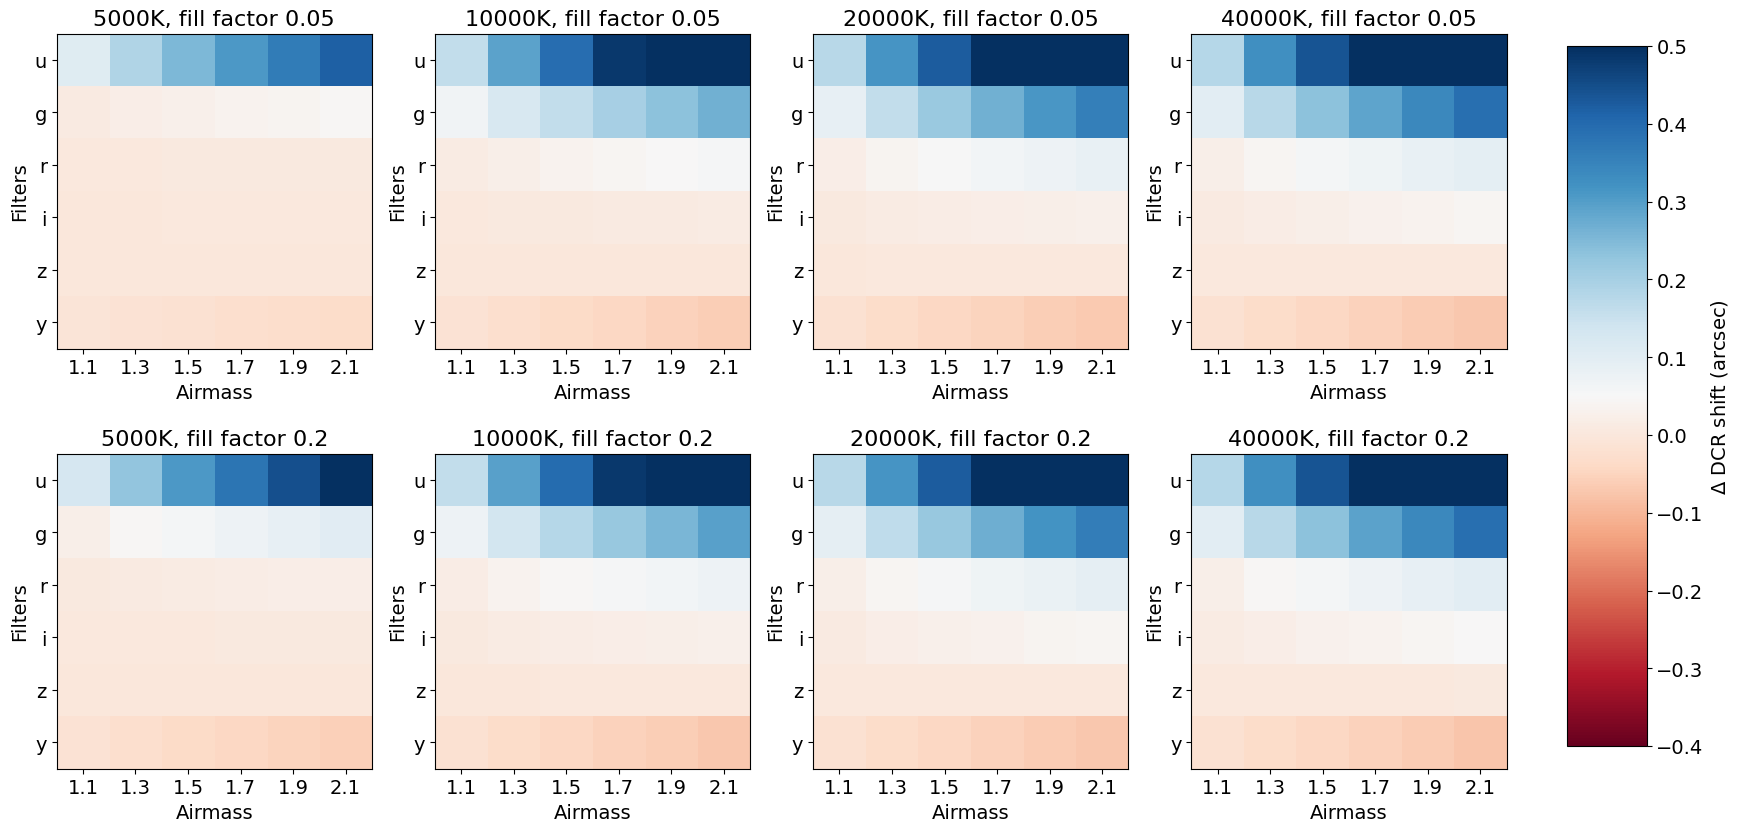

In [26]:
gridtemps = [5000,10000,20000,40000]
gridffs = [globals.FF, globals.FF*4]

#deltagrids = np.array([makegrid(gf,gt,AMS,delta=True) for gf, gt in gridffs, gridtemps])

fig5, ax5 = plt.subplots(2,4, figsize=(20,10))

for i, gf in enumerate(gridffs):
    for j, gt in enumerate(gridtemps):

        deltagrid = makegrid(gt, gf, AMS, delta=True)
        c = ax5[i,j].imshow(deltagrid.T, cmap='RdBu', clim=(-0.4, 0.5))
        ax5[i,j].set_xticks(range(6))
        ax5[i,j].set_xticklabels(np.round(AMS, decimals=2), fontsize=14)
        ax5[i,j].set_yticks(range(6))
        ax5[i,j].set_yticklabels(["u","g","r","i","z","y"], fontsize=14)
        ax5[i,j].set_ylabel("Filters", fontsize=14)
        ax5[i,j].set_xlabel("Airmass", fontsize=14)
        ax5[i,j].set_title('{0}K, fill factor {1}'.format(gt,gf), fontsize=16)

fig5.subplots_adjust(right=0.85)
cbar_ax = fig5.add_axes([0.88, 0.15, 0.04, 0.7])
cbar = fig5.colorbar(c, cax=cbar_ax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$\Delta$ DCR shift (arcsec)', fontsize=14)
plt.savefig("Figures/8grid.png", dpi=500, bbox_inches='tight')

## Making a cartoon DCR gif

In [28]:
#Simmed dDCR shift plot
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

np.random.seed(11037) #LEON!

#Invoke DCR machinery
temps = np.arange(3000,20000,500)
w_eff1 = np.array([lamb_eff_md(band='g', temp=t, ff=globals.FF, mdonly=True) for t in temps])
w_eff2 = np.array([lamb_eff_md(band='g', temp=t, ff=globals.FF) for t in temps])
dcrs = dcr_offset(w_eff2, airmass = 1.4)-dcr_offset(w_eff1, airmass = 1.4)

#Init positions
ra_pos = np.random.normal(0.0,0.1,size=50)
dec_pos = np.random.normal(0.0,0.1,size=50)

#Plotting
for temp, dcr in zip(temps, dcrs):

    #Update positions
    ra_pos += np.random.normal(0.0,0.01,size=len(ra_pos))
    dec_pos += np.random.normal(0.0,0.01,size=len(dec_pos))

    #Update flr star position
    flr_ra_pos = 0.1 + dcr * (1/np.sqrt(2)) + np.random.normal(0.0,0.01,size=1)[0]
    flr_dec_pos = 0.1 + dcr * (1/np.sqrt(2)) + np.random.normal(0.0,0.01,size=1)[0]
 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(ra_pos, dec_pos, alpha=0.75)
    ax.scatter(flr_ra_pos, flr_dec_pos, color='red', s=100, marker='*', label='Flare star')

    ax.plot([0,2],[0,2], c='gray',ls='--', label="to zenith")

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


    ax.set_xlabel(r"$\Delta$ RA (arcsec)", labelpad=150)
    ax.set_ylabel(r"$\Delta$ Dec (arcsec)", labelpad=150)
    ax.set_xticks([-0.4,-0.2,0.2,0.4])
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5,0.5)
    ax.set_title("Flare temp: {0}K, Airmass = {1}".format(temp, 1.4))
    ax.legend()
    ax.grid(False)

    fig.gca().set_aspect('equal')
    fig.savefig('Figures/sim_gif_figs/{}Ksim.png'.format(temp),dpi=300,bbox_inches='tight')
    plt.close()